In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


(370, 413)
float64


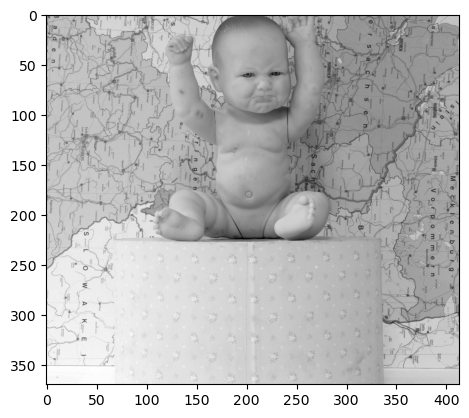

In [75]:
def read_img(path, filter_size =7):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.filter2D(img, -1, np.ones((filter_size,filter_size))/ (filter_size**2))
    img = img.astype('float64')
    return img

def plot_img(img, cmap="gray"):
    print(img.shape)
    print(img.dtype)
    plt.imshow(img.astype(int), cmap=cmap)

left = read_img("./data/view1.png", 1)
right = read_img("./data/view5.png", 1)
plot_img(left)

In [73]:
def cosine_similarity(x, y):
    # x = x.flatten()
    # y = y.flatten()
    numerator = np.dot(x, y)
    denominator = np.linalg.norm(x) * np.linalg.norm(y)
    return numerator / denominator


def computeCorrelationCofficient(X, Y):
    # X = X.flatten()
    # Y = Y.flatten()
    N = len(X)
    sum_xi_yi = np.sum(X)*np.sum(Y)
    numerator = N * X.dot(Y) - np.sum(X)*np.sum(Y)
    denominator = np.sqrt(N*np.sum(np.square(X))-np.sum(X)**2) * np.sqrt(N*np.sum(np.square(Y))-np.sum(Y)**2)
    return np.round(numerator / denominator,2)

In [89]:
from tqdm import tqdm
class StereoMatch():
    # when we take 1 object in fix 2 positions, the far, the fewer different between adjacent pixels
    # so if object near us, the disparity is high, vice versa
    # distance ~ 1/ disparity 
    def __init__(self, left, right, d=16):
        self.left = left
        self.right = right
        self.d = d
        self.disparity = np.zeros(self.left.shape)
        self.disparity_range = range(d)

    def matching(self, kernel_size = 3):
        h, w = self.left.shape
        right_d_matrix = []
        right_move_left_dpixel = self.right
        for d in self.disparity_range:
            if d !=0:
                # create matrix that move to the left of right image, padding -255 (because when take min of cost 2 images)
                right_move_left_dpixel = np.concatenate((np.ones((h,1))*(-255), right_move_left_dpixel[:,:-1 ]), axis = -1)
            right_d_matrix.append(right_move_left_dpixel)

        right_d_matrix = np.array(right_d_matrix)
        print(right_d_matrix.shape)
        print(self.left.shape)
        cost = self.__cost(self.left, right_d_matrix, kernel_size)
        # if kernel_size == 0:
        #     cost = self.__cost(self.left, right_d_matrix, kernel_size)
        # elif kernel_size > 0:
        #     cost = self.__cost(self.left, right_d_matrix, kernel_size)
        # for y in range(h):
        #     for x in range(w):
        #         d = np.argmin(cost[:, y, x])
        #         self.disparity[y,x] = d
        print(cost.shape)
        self.disparity = np.argmin(cost, axis = 0)
        print(self.disparity.shape)
        self.depth =  self.d * self.disparity

    def plotDepthImg(self, cmap = "bwr", scale = 1):
        self.depth *= scale
        plot_img(self.depth, cmap)
    def __windowMatching(self):
        pass

    def __cost(self,l, r, kernel_size = 3):
        # can change cost function
        # return (l-r)**2
        result = []
        kernel_half = int((kernel_size - 1) / 2)
        height, width = l.shape
        for i in tqdm(range(r.shape[0])):
            c = np.zeros(l.shape)
            for y in range(kernel_half, height-kernel_half):
                 for x in range(kernel_half, width-kernel_half):
                    wp = l[(y-kernel_half):(y+kernel_half)+1, (x-kernel_half):(x+kernel_half)+1]
                    wqd = r[i][(y-kernel_half):(y+kernel_half)+1, (x-kernel_half):(x+kernel_half)+1]
                    wp_flattened = wp.flatten()
                    wqd_flattened = wqd.flatten()
                    c[y, x] = np.mean(np.abs(wp_flattened - wqd_flattened))
            result.append(c)
            
        return np.array(result)

model = StereoMatch(left, right, 16)
model.matching()


(16, 370, 413)
(16, 370, 413)
(370, 413)


(370, 413)
int64


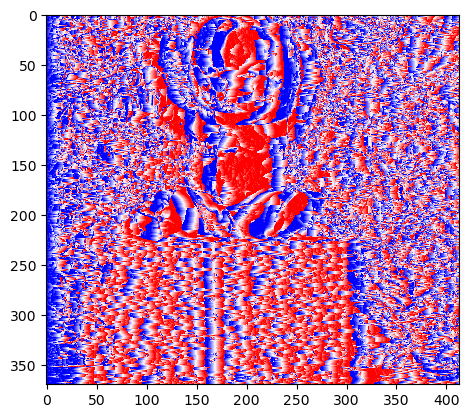

In [90]:
model.plotDepthImg()

In [5]:
a=  np.arange(20).reshape(4,5)
print(a)
c = np.ones((4,1))
print(c)
b = a
for i in range(5):
    b = np.concatenate((c, b[:, :-1]),axis=1)
    print(b)

print(np.argmin(b, axis=0))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[[1.]
 [1.]
 [1.]
 [1.]]
[[ 1.  0.  1.  2.  3.]
 [ 1.  5.  6.  7.  8.]
 [ 1. 10. 11. 12. 13.]
 [ 1. 15. 16. 17. 18.]]
[[ 1.  1.  0.  1.  2.]
 [ 1.  1.  5.  6.  7.]
 [ 1.  1. 10. 11. 12.]
 [ 1.  1. 15. 16. 17.]]
[[ 1.  1.  1.  0.  1.]
 [ 1.  1.  1.  5.  6.]
 [ 1.  1.  1. 10. 11.]
 [ 1.  1.  1. 15. 16.]]
[[ 1.  1.  1.  1.  0.]
 [ 1.  1.  1.  1.  5.]
 [ 1.  1.  1.  1. 10.]
 [ 1.  1.  1.  1. 15.]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[0 0 0 0 0]
